<a href="https://colab.research.google.com/github/Faizack/Clone/blob/main/bank_loan_preprocessing_modeling_with_5_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [ ]:
trainD= pd.read_csv('/content/credit_train.csv')
testD= pd.read_csv('/content/credit_test.csv')


In [ ]:
print("trainD Shape",trainD.shape) #Shape- no of rows and columns
print("trainD Size",trainD.size) #Size- number of elements in the data file
print("testD Shape",trainD.shape) #Shape- no of rows and columns
print("testD Size",trainD.size) #Size- number of elements in the data file

trainD Shape (11154, 19)
trainD Size 211926
testD Shape (11154, 19)
testD Size 211926


In [ ]:
def details(df):
    sum_null_values = df.isnull().sum()
    percent_null_values = 100* (sum_null_values/len(df))
    data_type = df.dtypes
    unique_values = df.nunique()

    table = pd.concat([sum_null_values,percent_null_values,data_type,unique_values], axis=1)
    table_col = table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Missing Values', 2 : 'Data_Type', 3: 'Unique values'})
    return table_col

In [ ]:
print("Details of Train Data".center(100))
details(trainD)

                                       Details of Train Data                                        


,Missing Values,% of Total Missing Values,Data_Type,Unique values
Loan ID,0,0.000000,object,10934
Customer ID,0,0.000000,object,10934
Loan Status,0,0.000000,object,2
Current Loan Amount,0,0.000000,int64,7325
Term,0,0.000000,object,2
Credit Score,2175,19.499731,float64,285
Annual Income,2175,19.499731,float64,7818
Years in current job,476,4.267527,object,11
Home Ownership,0,0.000000,object,4
Purpose,0,0.000000,object,15


In [ ]:
print("Details of Test Data".center(100))
details(testD)

                                        Details of Test Data                                        


,Missing Values,% of Total Missing Values,Data_Type,Unique values
Loan ID,353,3.409640,object,10000
Customer ID,353,3.409640,object,10000
Current Loan Amount,353,3.409640,float64,6786
Term,353,3.409640,object,2
Credit Score,2334,22.544190,float64,272
Annual Income,2334,22.544190,float64,7200
Years in current job,780,7.534048,object,11
Home Ownership,353,3.409640,object,4
Purpose,353,3.409640,object,16
Monthly Debt,353,3.409640,float64,9729


**Observation :** As We can see that there Many Missing Value

In [ ]:
def clean_data(df):
    """
    Cleans the dataframe by filling in missing values with the mean (for numerical columns) 
    or mode (for categorical columns) and removing any columns with more than 70% missing data.
    Returns the cleaned dataframe.
    """
    # Remove columns with more than 70% missing data
    threshold = 0.7
    df = df.loc[:, df.isnull().mean() < threshold]
    
    # Fill missing values with mean (for numerical columns) or mode (for categorical columns)
    for col in df.columns:
        if df[col].dtype == 'object':
            mode = df[col].mode()[0]
            df[col].fillna(mode, inplace=True)
        else:
            mean = df[col].mean()
            df[col].fillna(mean, inplace=True)
    
    return df


In [ ]:
cleaned_Train_df = clean_data(trainD)
cleaned_Test_df = clean_data(testD)


In [ ]:
print("Details of Train Data".center(100))
details(cleaned_Train_df)

                                       Details of Train Data                                        


,Missing Values,% of Total Missing Values,Data_Type,Unique values
Loan ID,0,0.0,object,10934
Customer ID,0,0.0,object,10934
Loan Status,0,0.0,object,2
Current Loan Amount,0,0.0,int64,7325
Term,0,0.0,object,2
Credit Score,0,0.0,float64,286
Annual Income,0,0.0,float64,7819
Years in current job,0,0.0,object,11
Home Ownership,0,0.0,object,4
Purpose,0,0.0,object,15


In [ ]:
print("Details of Test Data".center(100))
details(cleaned_Test_df)

                                        Details of Test Data                                        


,Missing Values,% of Total Missing Values,Data_Type,Unique values
Loan ID,0,0.0,object,10000
Customer ID,0,0.0,object,10000
Current Loan Amount,0,0.0,float64,6787
Term,0,0.0,object,2
Credit Score,0,0.0,float64,273
Annual Income,0,0.0,float64,7201
Years in current job,0,0.0,object,11
Home Ownership,0,0.0,object,4
Purpose,0,0.0,object,16
Monthly Debt,0,0.0,float64,9730


**Observation :** Missing value treated

### Removing unwanted columns

In [ ]:
cleaned_Train_df.drop(['Loan ID','Customer ID'],axis=1,inplace=True)
cleaned_Test_df.drop(['Loan ID','Customer ID'],axis=1,inplace=True)

In [ ]:
cleaned_Train_df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.115400e+04,11154.000000,1.115400e+04,11154.000000,11154.000000,11154.000000,11154.000000,11154.000000,1.115400e+04,1.115400e+04,11154.000000,11154.000000
mean,1.154716e+07,1107.312841,1.373749e+06,18427.322985,18.187367,35.392243,11.103739,0.172330,2.924350e+05,8.201877e+05,0.121340,0.029325
std,3.152491e+07,1374.428134,8.119074e+05,12057.061517,6.935007,15.147257,4.999408,0.481969,3.488283e+05,8.087173e+06,0.353927,0.241304
min,2.147200e+04,587.000000,1.112450e+05,0.000000,3.600000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.786235e+05,712.000000,9.299312e+05,10072.660000,13.500000,35.000000,8.000000,0.000000,1.110788e+05,2.695770e+05,0.000000,0.000000
50%,3.118610e+05,733.000000,1.373749e+06,16203.010000,16.900000,35.392243,10.000000,0.000000,2.089525e+05,4.636170e+05,0.000000,0.000000
75%,5.254645e+05,751.000000,1.507778e+06,24076.847500,21.600000,35.392243,14.000000,0.000000,3.686570e+05,7.834970e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,3.083900e+07,120559.560000,53.200000,152.000000,48.000000,7.000000,7.423870e+06,6.324777e+08,5.000000,6.000000


## EDA For Data

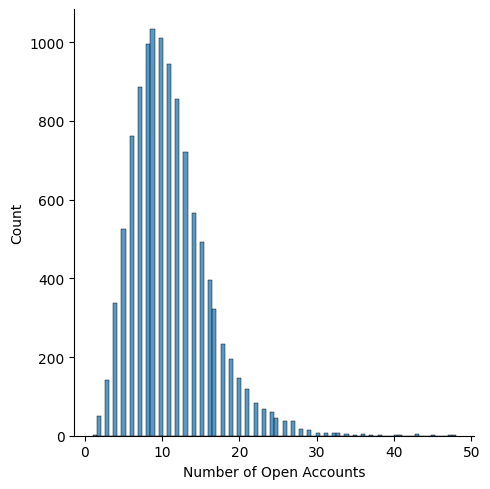

In [ ]:
sns.displot(trainD['Number of Open Accounts'])

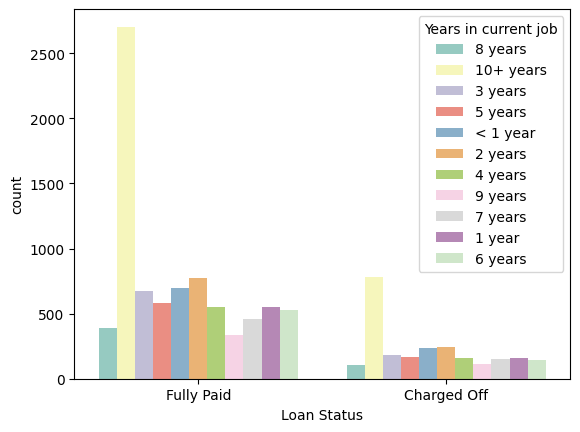

In [ ]:
ax = sns.countplot(x="Loan Status", data=trainD,hue="Years in current job",palette="Set3")

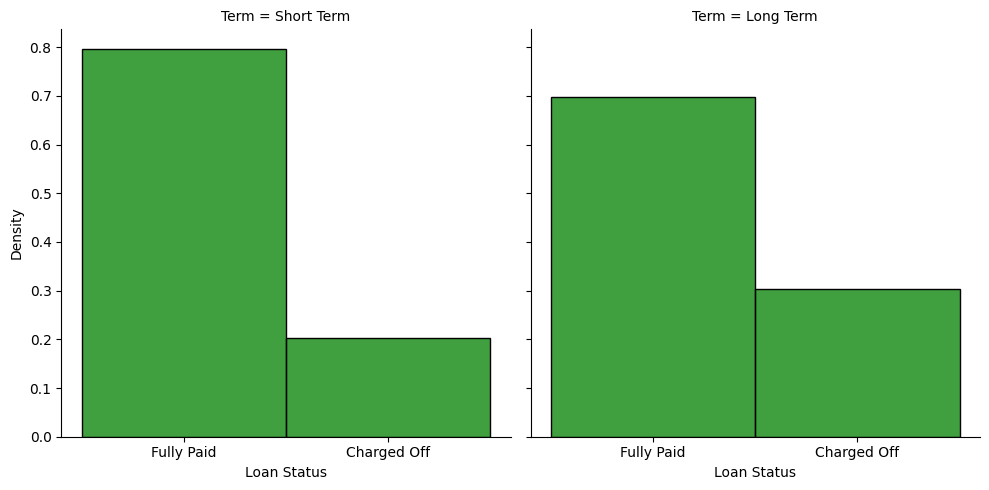

In [ ]:
sns.displot(trainD,x="Loan Status", col="Term", stat="density",common_norm=False,color="green")


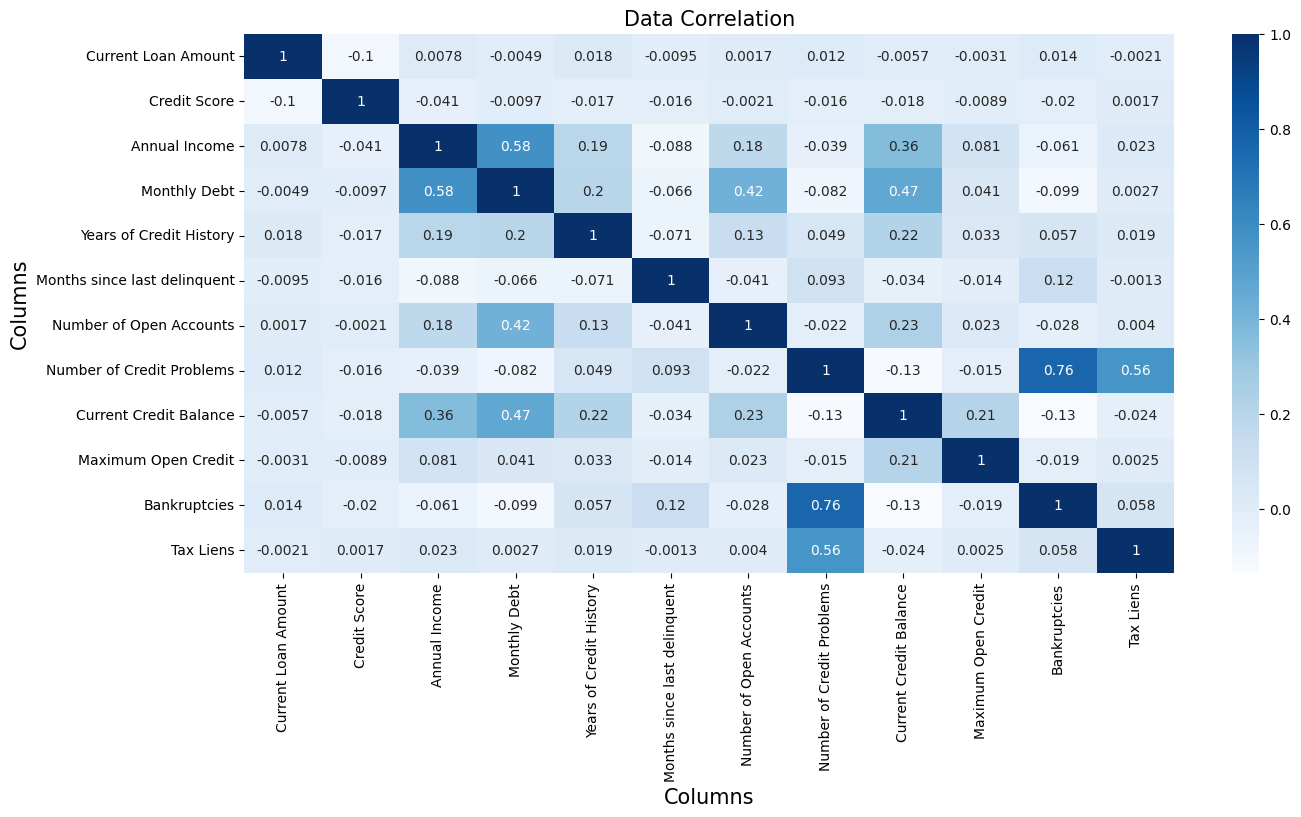

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(trainD.corr(),annot=True,cmap="Blues")
plt.title("Data Correlation",size=15)
plt.ylabel("Columns",size=15)
plt.xlabel("Columns",size=15)
plt.show()

## Encoding With LabelEncoder

In [ ]:
cleaned_Train_df.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [ ]:
def label_encode(df):
    """
    Performs label encoding for all object and category type columns in a dataframe,
    including the target column. Returns the encoded dataframe.
    """
    # Create a copy of the dataframe
    encoded_df = df.copy()
    
    # Create a LabelEncoder object
    le = LabelEncoder()
    
    # Encode object and category type columns
    for col in encoded_df.select_dtypes(include=['object', 'category']):
        encoded_df[col] = le.fit_transform(encoded_df[col])
    
    
    
    return encoded_df

In [ ]:
df_train = label_encode(cleaned_Train_df)
# Encode the target variable
le = LabelEncoder()
df_train['Loan Status'] = le.fit_transform(df_train['Loan Status'])


In [ ]:
df_train.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [ ]:
df_test = label_encode(cleaned_Test_df)


## Separate the target variable from the train dataset

In [ ]:
x=df_train.drop(['Loan Status'], axis=1)
Y=df_train['Loan Status']
x_train, x_test, Y_train, Y_test = train_test_split(x,Y, train_size = 0.7, test_size = 0.3, random_state = 1)

## Defining Runnning And Evalting 5 Model

* Logistic Regression
* Decision Tree 
* KNN
* Naive Bayes (Gaussian)
* Random Forest


In [ ]:
def evaluate_models(X_train, y_train, X_test, y_test):
    # Define the models
    models = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Naive Bayes (Gaussian)': GaussianNB(),
        'Random Forest': RandomForestClassifier(),     
    }

    # Fit the models, make predictions, and calculate evaluation metrics
    results = {}
    for name, model in models.items():
        # Fit the model using cross-validation
        scores = cross_val_score(model, X_train, y_train, cv=5)
        print(f"Model: {name}")
        print(f"Cross-validation scores: {scores}")
        print(f"Mean cross-validation score: {scores.mean()}")
        print(f"Standard deviation of cross-validation scores: {scores.std()}")

        # Fit the model on the entire training set and make predictions
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics on the test set
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        auc_roc = roc_auc_score(y_test, y_pred)
        confusion = confusion_matrix(y_test, y_pred)
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        results[name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'auc_roc': auc_roc,
            'confusion': confusion,
            'fpr': fpr,
            'tpr': tpr,
            'roc_auc': roc_auc
        }
        
        # Print the evaluation metrics
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1}")
        print(f"AUC-ROC: {auc_roc}")
        
        print(f"Confusion Matrix:\n")

      
        # Create the heatmap
        sns.heatmap(confusion, annot=True,fmt='d', cmap="Blues")

        # Add labels and title
        plt.xlabel("Predicted label")
        plt.ylabel("True label")
        plt.title("Confusion Matrix")

        # Show the plot
        plt.show()

        print("")
        print("")

        # Plot the ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(name + ' ROC Curve')
        plt.legend(loc="lower right")
        plt.show()

    return results

Model: Logistic Regression
Cross-validation scores: [0.81434059 0.81241997 0.81486227 0.80525304 0.8161435 ]
Mean cross-validation score: 0.8126038743672799
Standard deviation of cross-validation scores: 0.0038655916588664265
Accuracy: 0.8099790857484315
Precision: 0.8425620193392704
Recall: 0.5990840079497786
F1 Score: 0.6119440097653316
AUC-ROC: 0.5990840079497786
Confusion Matrix:
[[ 160  614]
 [  22 2551]]



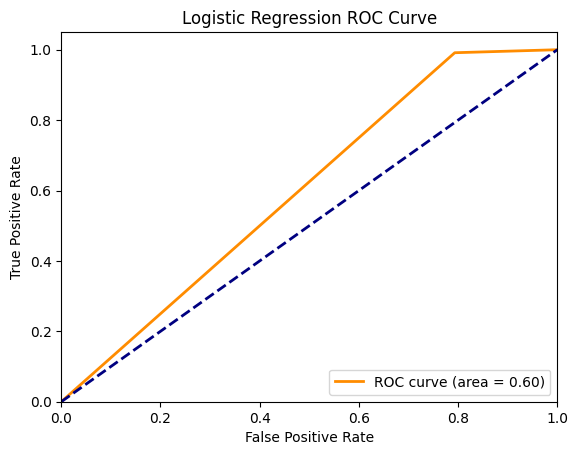

Model: Decision Tree
Cross-validation scores: [0.7503201  0.73559539 0.72133248 0.72709801 0.7264574 ]
Mean cross-validation score: 0.7321606770668856
Standard deviation of cross-validation scores: 0.010168281974349318
Accuracy: 0.7224380041828503
Precision: 0.6125566462469555
Recall: 0.6148653127137206
F1 Score: 0.613658923641997
AUC-ROC: 0.6148653127137206
Confusion Matrix:
[[ 321  453]
 [ 476 2097]]



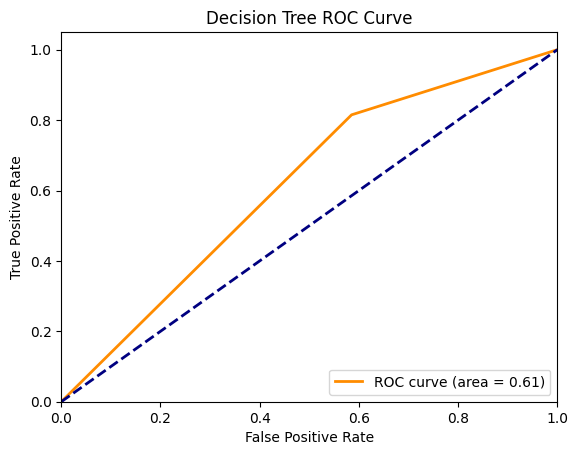

Model: K-Nearest Neighbors
Cross-validation scores: [0.72471191 0.72791293 0.73030109 0.71556694 0.72581678]
Mean cross-validation score: 0.7248619314747022
Standard deviation of cross-validation scores: 0.005024421916795835
Accuracy: 0.7269196295189723
Precision: 0.5482589195059286
Recall: 0.5274463696245346
F1 Score: 0.5221505146574594
AUC-ROC: 0.5274463696245346
Confusion Matrix:
[[ 121  653]
 [ 261 2312]]



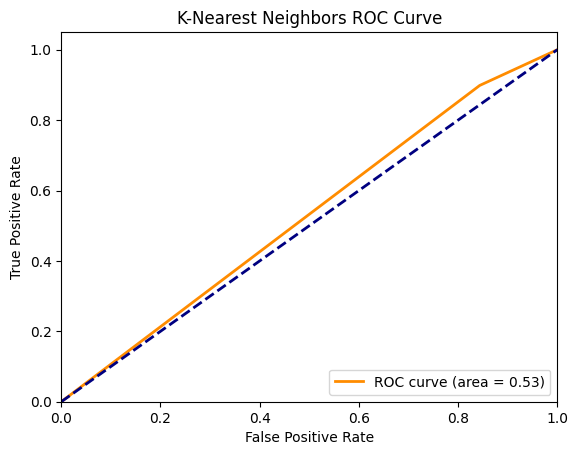

Model: Naive Bayes (Gaussian)
Cross-validation scores: [0.35787452 0.368758   0.36194747 0.35874439 0.35618193]
Mean cross-validation score: 0.3607012642508126
Standard deviation of cross-validation scores: 0.0044431570432575075
Accuracy: 0.3558410516880789
Precision: 0.6258232812550126
Recall: 0.5787754669591093
F1 Score: 0.348842086266017
AUC-ROC: 0.5787754669591092
Confusion Matrix:
[[ 769    5]
 [2151  422]]



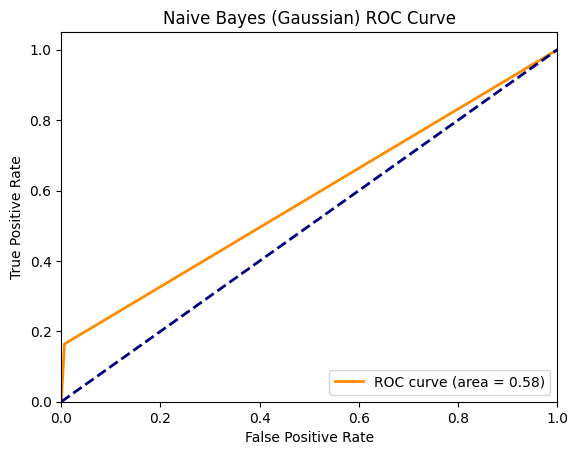

Model: Random Forest
Cross-validation scores: [0.82138284 0.81370038 0.81742473 0.80845612 0.81934657]
Mean cross-validation score: 0.8160621289908223
Standard deviation of cross-validation scores: 0.004569102366607642
Accuracy: 0.8126680609501046
Precision: 0.8262622887522647
Recall: 0.6103179911443725
F1 Score: 0.6280613479209074
AUC-ROC: 0.6103179911443725
Confusion Matrix:
[[ 181  593]
 [  34 2539]]



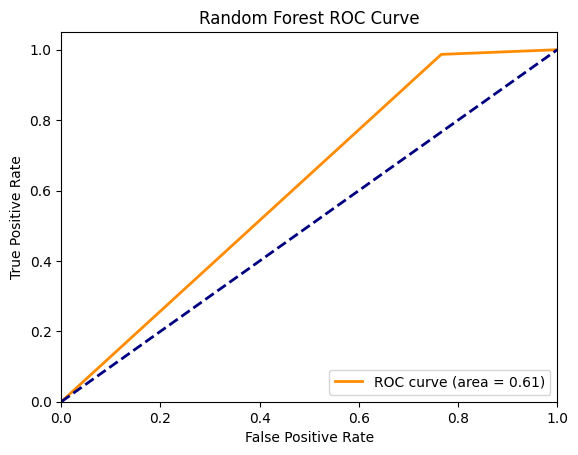

In [ ]:
results = evaluate_models(x_train , Y_train, x_test,Y_test)